<a href="https://colab.research.google.com/github/fwkhan/CE802/blob/master/CE802_P3_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler, quantile_transform
# from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



# Reading Training Data
  

In [2]:
train_data = pd.read_csv('CE802_P3_Data.csv')
final_test_data  = pd.read_csv('CE802_P3_Test.csv')
test_data = final_test_data.copy()

# Data Analysis

## Function to print Train Data
This function takes all the columns and print their info sequentially


In [3]:
def print_data_info(train_data, col_name):
  """ 
    Prints information about train or test data. 

    This function prints information of each feature of a DataFrame, giving
    details about dtype, describe, min value, max value and null counts. 

    Parameters: 
    train_data (DataFrame): Input Training Data set  
    col_name   (str): Name of a feature

    Returns: No return Value
    
  """   
  print(f'*********Train Data Info************')
  print(f'***********{col_name}***************')
  print(f'data type  = {train_data[col_name].dtype}')
  print(f'MIN Value  = {train_data[col_name].min()}')
  print(f'MAX Value  = {train_data[col_name].max()}')
  print(f'NULL Values  = {train_data[col_name].isnull().sum()}')




## Train Data Analysis






In [4]:
# Analysis of train data showing info and null count
print(f'{train_data.info(null_counts=False)}')
print(f'Null Value Information')
print(f'{train_data.isnull().sum()}')
# Printing information about each feature in loop.
for col_name in train_data.columns:
  print_data_info(train_data, col_name)
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Dtype  
---  ------  -----  
 0   F1      float64
 1   F2      object 
 2   F3      float64
 3   F4      float64
 4   F5      float64
 5   F6      int64  
 6   F7      float64
 7   F8      float64
 8   F9      float64
 9   F10     float64
 10  F11     float64
 11  F12     float64
 12  F13     float64
 13  F14     float64
 14  F15     object 
 15  F16     int64  
 16  Target  float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB
None
Null Value Information
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64
*********Train Data Info************
***********F1***************
data type  = float64
MIN Value  = 0.08
MAX Value  = 46.78
NULL Values  = 0
*********Train Data Info************
******

##Scatter Plot of Train Data

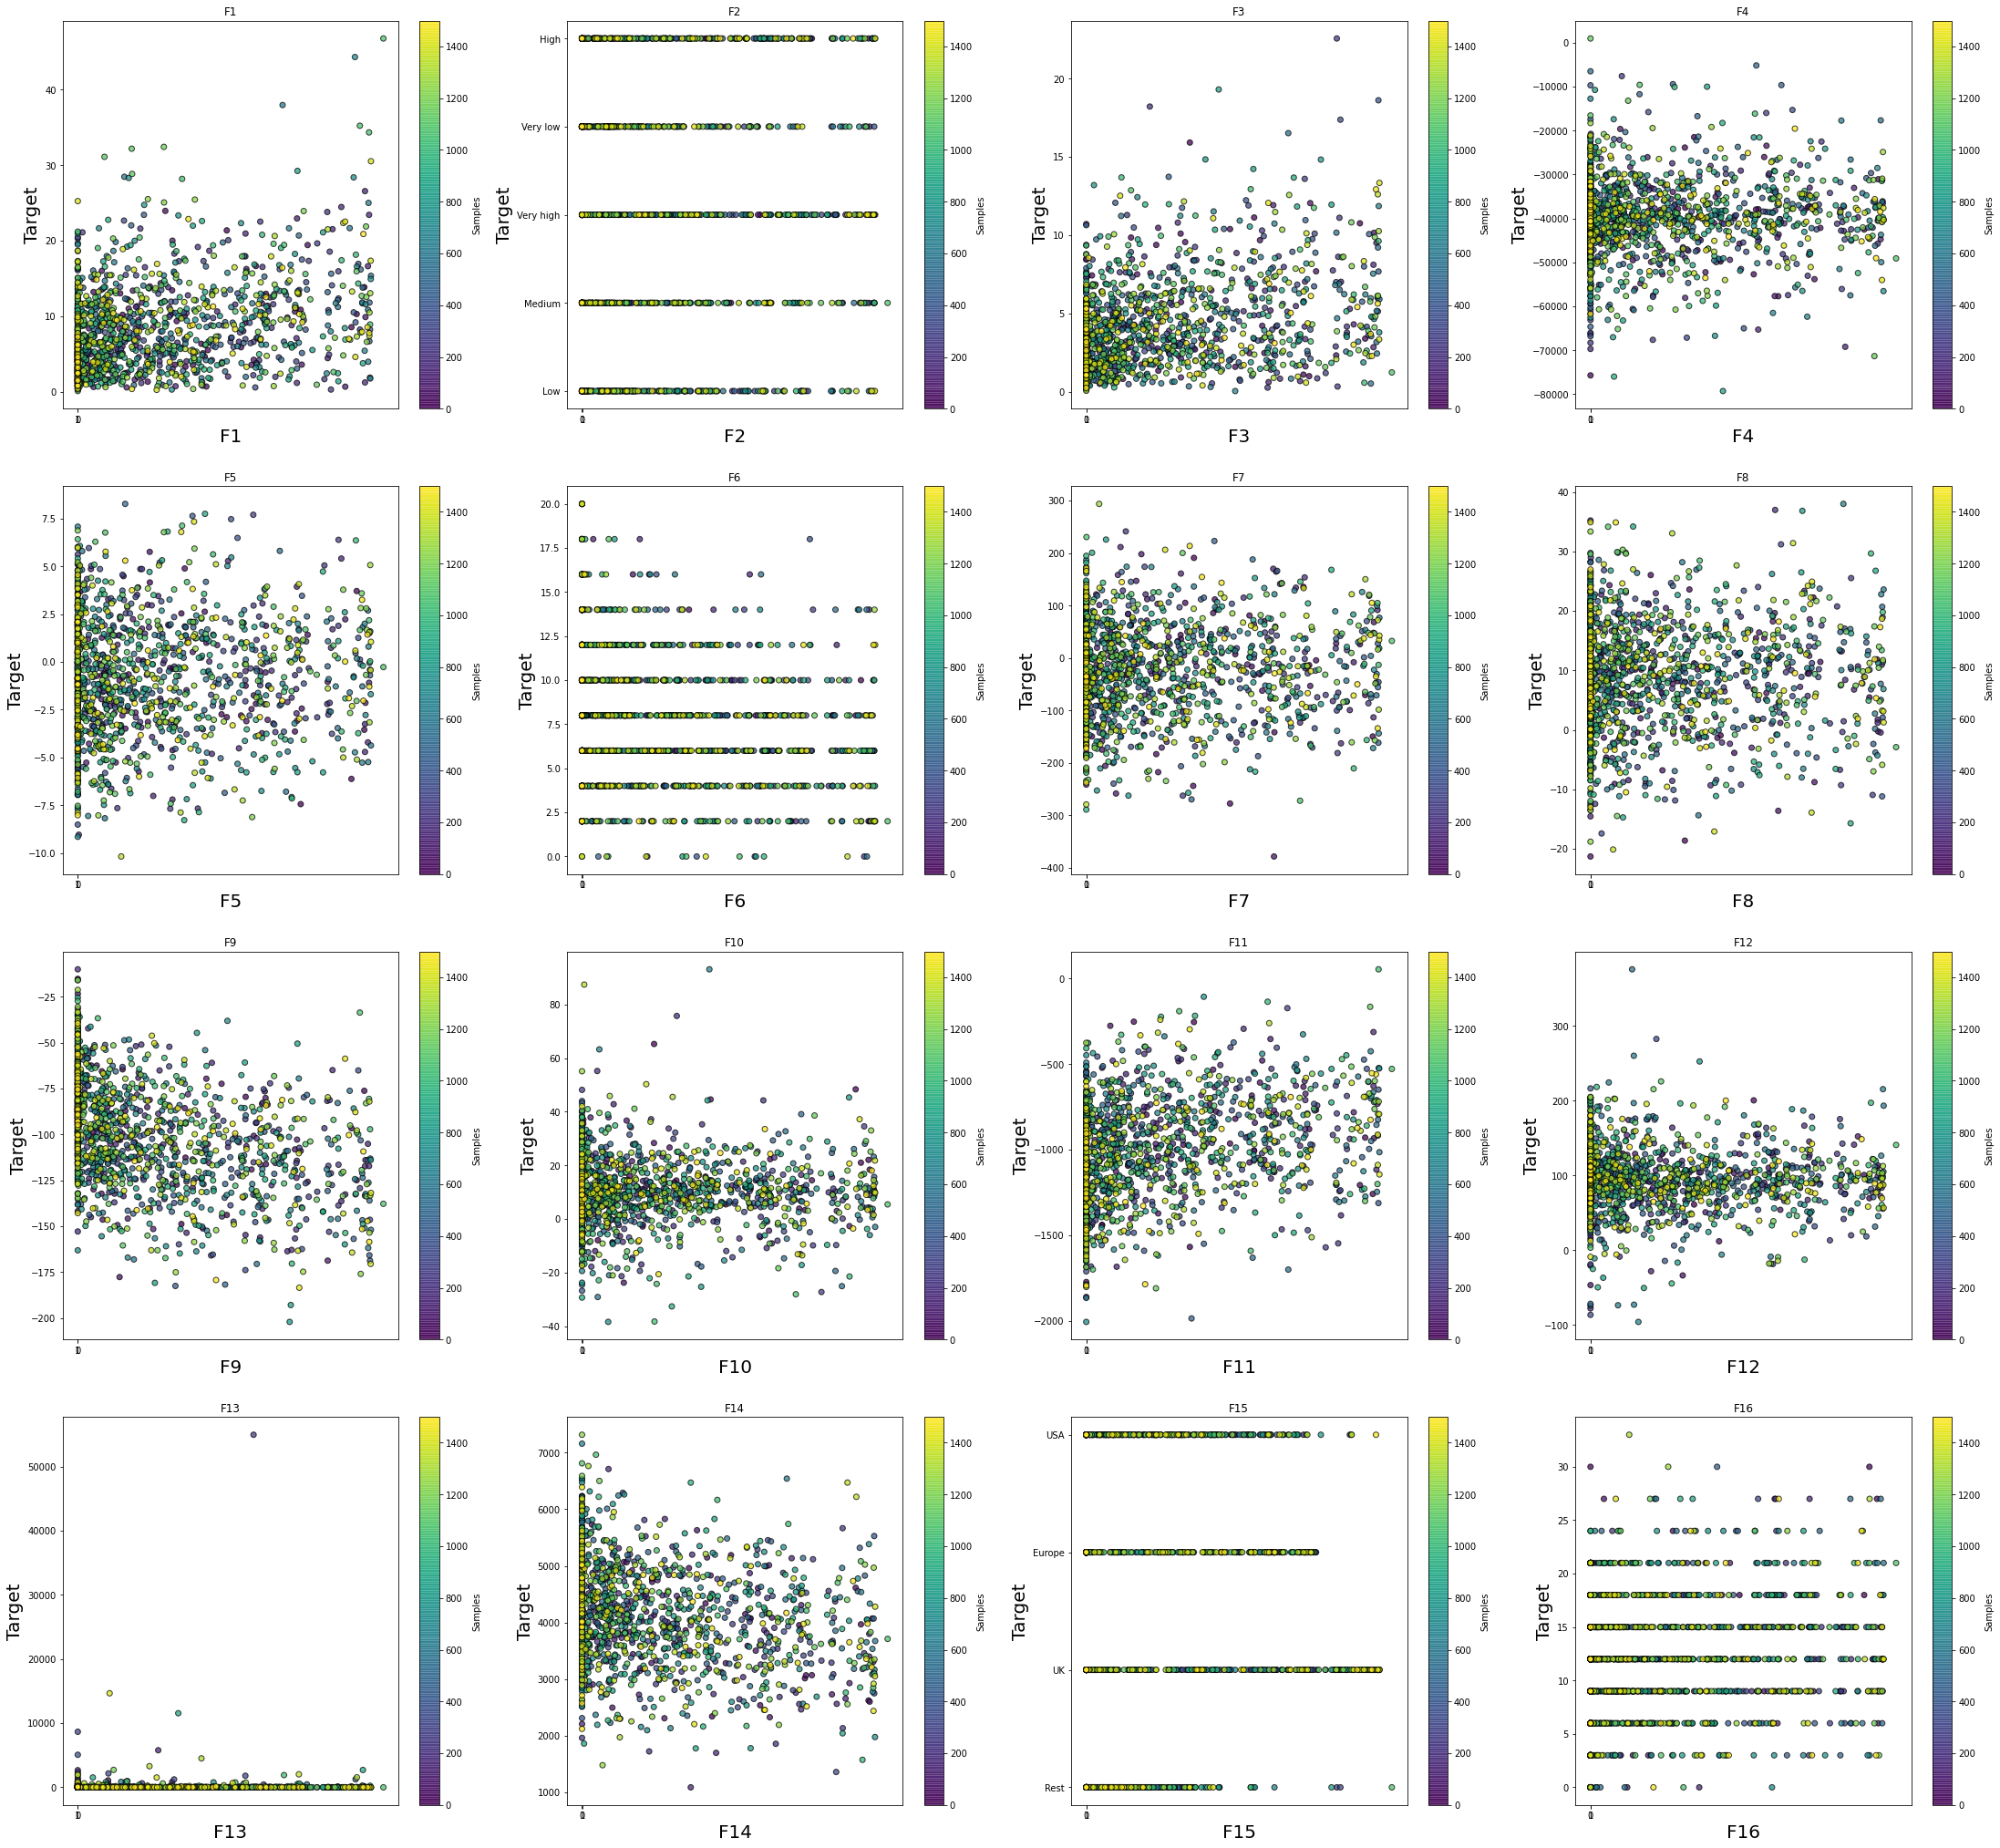

In [5]:
import matplotlib.pyplot as plt

x = train_data.iloc[:,:-1]
y = train_data['Target']

plt.figure(figsize=(38,36))

samples = []
for number in range(0,1500):
  samples.append(number)  # Marking samples with different color
for i in range(x.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.scatter(y,x.iloc[:,i], c=samples, edgecolors='black', linewidths=1, alpha=0.75)

    plt.xticks([0, 1])
    plt.title(train_data.columns[i])
    plt.xlabel(train_data.columns[i], fontsize=20)
    plt.ylabel('Target', fontsize=20)
    col_bar = plt.colorbar()

    col_bar.set_label('Samples')

##Bar Plot to Check Missing Numbers

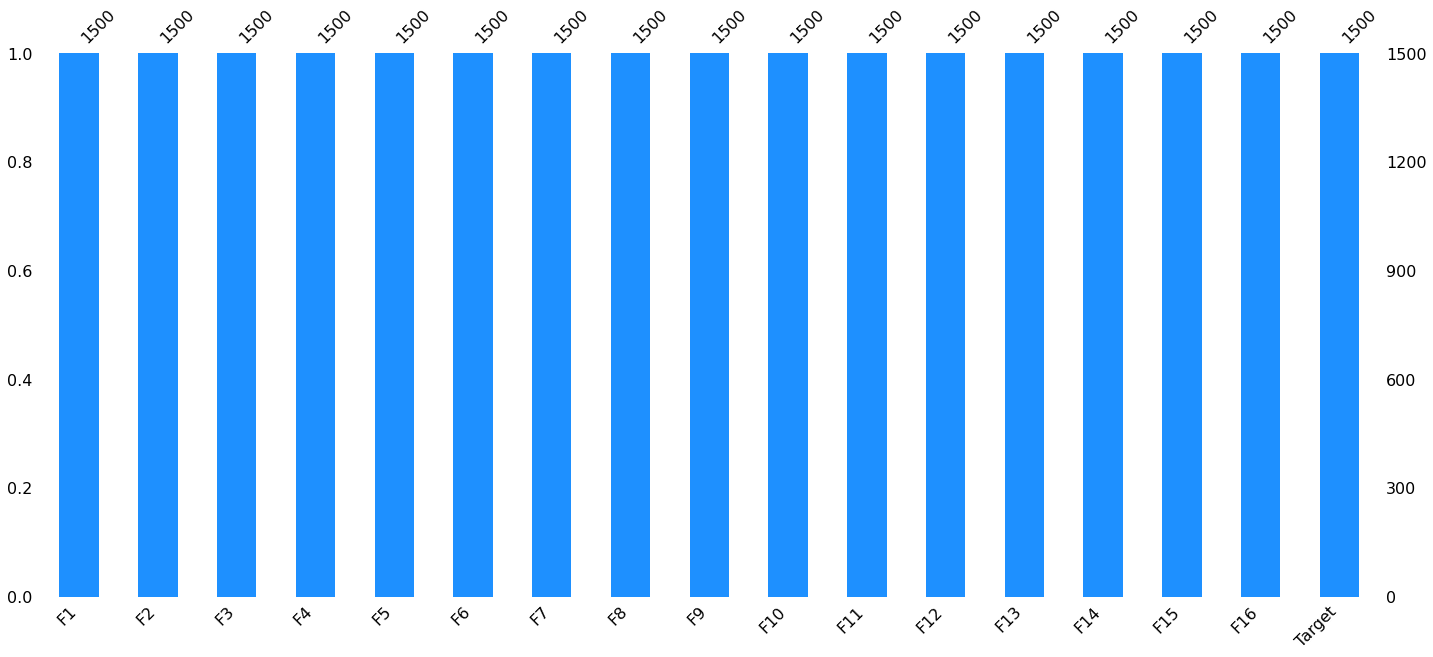

In [6]:
import missingno as msno
msno.bar(train_data, color='dodgerblue')


## Test Data Analysis


In [7]:
print(f'{test_data.info(null_counts=False)}')
print(f'Null Value Information')
print(f'{test_data.isnull().sum()}')
# Printing information about each feature in loop.
for col_name in test_data.columns:
  print_data_info(test_data, col_name)
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Dtype  
---  ------  -----  
 0   F1      float64
 1   F2      object 
 2   F3      float64
 3   F4      float64
 4   F5      float64
 5   F6      int64  
 6   F7      float64
 7   F8      float64
 8   F9      float64
 9   F10     float64
 10  F11     float64
 11  F12     float64
 12  F13     float64
 13  F14     float64
 14  F15     object 
 15  F16     int64  
 16  Target  float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB
None
Null Value Information
F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
Target    1500
dtype: int64
*********Train Data Info************
***********F1***************
data type  = float64
MIN Value  = 0.08
MAX Value  = 36.0
NULL Value

#Data Preprocessing

## Handling Categorical data

---OnehotEncode for Categorical data Column F15


---Mapping Ordinal data to numerical values for F2 Column





In [8]:
train_data = pd.get_dummies(train_data, columns= ['F15'])
map_dummies = {'F2': {'Very low': 0, 'Low':1, 'Medium':2,'High':3,'Very high':4}}
train_data.replace(map_dummies, inplace=True)
train_data
column_name = train_data.columns


##BoxPlot of Training data 


---Boxplot gives detail about Skewness in data


---Presence of Outliers





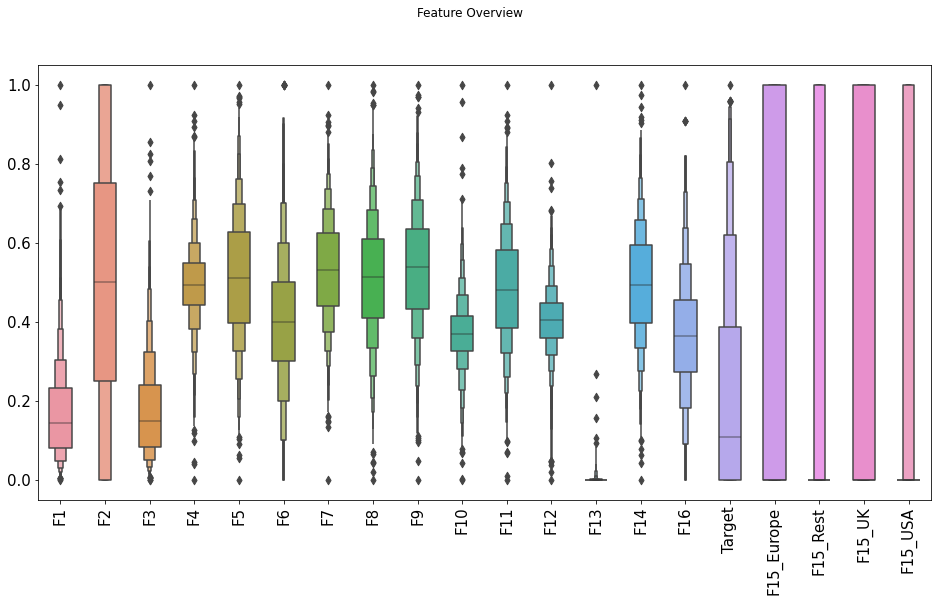

In [9]:
from matplotlib import pyplot
import seaborn as sns

data = train_data.copy()
scalar = MinMaxScaler()
# Copy of Train Data is scaled just for plotting, otherwise the plot is
# difficult to analyze because of the difference in range of numerical values.
data = scalar.fit_transform(train_data.values.reshape(-1, len(train_data.columns)))
data = pd.DataFrame(data, columns=train_data.columns)

fig = pyplot.figure(figsize=(16,8)) 
fig.suptitle('Feature Overview') 
ax = fig.add_subplot(111) 

sns.boxenplot(data=data, width=0.5) 
plt.tick_params(labelsize=15)
plt.xticks(rotation=90)
pyplot.show()

In [10]:
test_data = pd.get_dummies(test_data, columns= ['F15'])
map_dummies = {'F2': {'Very low': 0, 'Low':1, 'Medium':2,'High':3,'Very high':4}}
test_data.replace(map_dummies, inplace=True)
test_data


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F16,Target,F15_Europe,F15_Rest,F15_UK,F15_USA
0,3.06,3,1.32,-50743.74,-1.08,2,10.11,1.74,-67.98,16.17,-1257.99,29.75,6.96,4750.68,12,NaN,1,0,0,0
1,9.98,2,2.51,-57574.32,-0.75,12,-126.69,9.84,-150.96,0.66,-1257.20,104.60,0.02,3623.19,6,NaN,0,0,1,0
2,2.30,0,3.43,-31777.88,-0.03,8,-21.75,10.62,-124.71,11.94,-345.02,154.47,315.58,4274.67,9,NaN,1,0,0,0
3,2.42,4,6.67,-42583.36,7.02,8,-185.70,-5.40,-93.20,6.60,-1276.61,40.70,6.40,3892.74,3,NaN,0,0,1,0
4,2.24,4,3.23,-39844.64,-2.44,4,28.41,14.07,-68.80,1.89,-1199.55,85.06,0.20,4624.62,15,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,7.98,1,1.63,-43877.88,-5.15,8,-231.90,6.51,-84.61,18.27,-699.21,114.49,0.02,4532.28,6,NaN,0,0,0,1
1496,1.56,0,4.88,-36617.72,-3.67,2,-87.66,13.17,-63.19,4.95,-1255.81,136.94,0.06,3413.76,15,NaN,0,0,1,0
1497,12.50,1,2.01,-41082.92,1.53,4,109.80,19.14,-103.40,33.03,-1236.41,-72.87,0.14,5322.63,3,NaN,0,1,0,0
1498,15.10,3,3.40,-44150.34,1.81,6,-36.15,7.26,-93.44,-4.80,-997.31,-15.64,4.46,3910.80,12,NaN,0,0,1,0


##Skewness in Train Data

In [11]:
for i in range(0,20):
    print(train_data.iloc[:,i].skew())

1.4979207676780362
0.03155314993238136
1.45825972099921
-0.06466433907812721
0.01836748413840014
0.3936966152504664
-0.04586130023765057
-0.08723070425395381
-0.12785099075467293
0.4467338632195256
0.02518131502925267
0.045611265940565096
30.68208781969422
0.025422567742218356
0.3907272082141265
1.1191255159225326
1.1354435371325675
1.2187806744389034
1.0295595294184554
1.2490679744175872


## Correlation between different Columns 





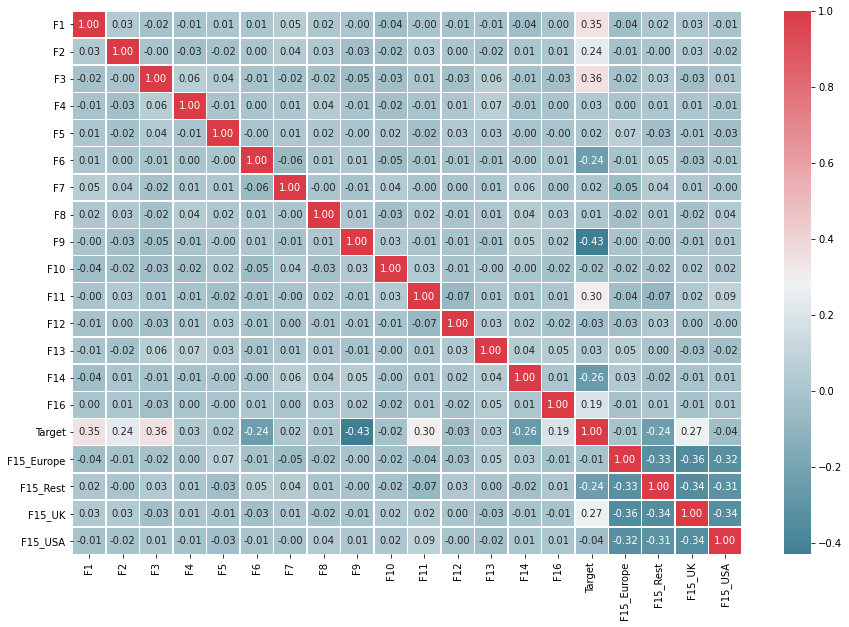

In [12]:
#Correlation analysis using Seaborn heatmap for data analysis
corr_matrix=train_data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap=colormap);

##Class to clip Outliers

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from statistics import median
import numpy as np
# This class in based on the Exercie-3 of Machine learning Lab-3

class OutlierScaler(BaseEstimator, TransformerMixin):
  def __init__(self, qoffset=1.5):
      """ 
        Initializes OutlierScaler Scaler object. 

        Initialized lower quartile, higher quartile, inter quartile range
        variables

        Parameters: 
        q_offset (float): Multiplier offset value  


        Returns: 
        class object 

      """        
      self.qoffset = qoffset
      self.outlier_columns = [] # list of features containing outliers
      self.lower_limit = {} # dictionary with key as feature and value as lower
                            # limit, below which all samples are treated as outliers
      self.upper_limit = {} # dictionary with key as feature and value as upper
                            # limit, above which all samples are treated as outliers

  def fit(self, X, y=None):
      """ 
        Fits data for transformation. 

        Calculates Inter Quartile range and
        Lower an Upper limit, w.r.t to each coloum, beyond which samples will
        be clipped.

        Parameters: 
        X (DataFrame): Training Data Set
        y (Series)  : Training dependent variable

        Returns: 
        class object 

      """       
      X = pd.DataFrame(X, columns=column_name)
      for col_name in X.columns:
        Q1 = X[col_name].quantile(0.01) # Lowere Quartile Value
        Q3 = X[col_name].quantile(0.9) # Higher Quartile Value
        IQR = Q3-Q1 # Inter Quartile Range
        # Storing lower limit specific to each feature
        self.lower_limit[col_name] = Q1 - self.qoffset*IQR 
        # Storing Upper limit specific to each feature
        self.upper_limit[col_name] = Q3 + self.qoffset*IQR
        # Finding out features for which their sample crosses lowere and upper
          # limit and storing it.
        if (len(X[( X[col_name]<self.lower_limit[col_name]) | (X[col_name] > self.upper_limit[col_name])][col_name])) >= 1:
          self.outlier_columns.append(col_name)
      
      return self

  def transform(self, X, y=None):
      """ 
        Transform data & Clip outliers. 

        Stores only the sample which are between lower and upper limit of each
        feature, calculated with fit() function.

        Parameters: 
        X (DataFrame): Training Data Set
        y (Series)  : Training dependent variable

        Returns: 
        X (DataFrame) Data without outliers. 
      """
      X = pd.DataFrame(X, columns=column_name)
      for col_name in self.outlier_columns:
        # Storing only the sample which are between lower and upper limit of each
        #feature.         
        X = X [ ( X[col_name] > self.lower_limit[col_name]) & (X[col_name] < self.upper_limit[col_name])]
      return X

  def fit_transform(self, X, y=None, **fit_params):
      """ Performs fit and transform sequentially"""
      self.fit(X, y)
      return self.transform(X, y)

##Wrapper for Data Scaling

In [14]:
def normalize_data(normalize_type, data):
  """ 
    Performs data Scaling. 

    This function performs 3 differnet data Scaling strategies;
     - MinMaxScaler
     - StandardScaler
     - QuantileScaler 

    Parameters: 
    normalize_type (str): Scaling Strategy  
    data (DataFrame): Labelled Training Data 

    Returns: 
    data: Scaled Data 

  """   
  print(f'Normalization Type: {normalize_type}')
  if normalize_type == 'MinMaxScaler':
    # Range is between 0.1 - 1.1 as log normalize can not handle 0 values.
    scalar = MinMaxScaler(feature_range=(0.1,1.1))
    data = scalar.fit_transform(data.values.reshape(-1, len(pd.DataFrame(data).columns)))
  elif normalize_type == 'StandardScaler':
    scalar = StandardScaler()
    data = scalar.fit_transform(data)
  elif normalize_type == 'QuantileScaler' :
    # Makes Gaussian distribution of data
    scalar = QuantileTransformer(output_distribution='normal')
    data = scalar.fit_transform(data)
  return data

# Performance Modeling

##Wrapper for Cross-Validation and Grid Search

In [15]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def model_grid_search(model, parameters, X_train, y_train):
  """ 
    Performs Grid Search hyper parameter tuning. 

    This function does Stratified K-fold Cross-Validation with 10 splits and 
    performs Grid Search. Best estimator obtained with Grid Search performs 
    training on the train data.

    Parameters: 
    model (str): Initialed object of one of the ML model  
    parameters (DataFrame): list of hyper parameters 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data     

    Returns: 
    grid_search: Object obtained from GridSearchCV 

  """   
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  grid_search = GridSearchCV(estimator = model, param_grid = parameters,
                            cv=cv, return_train_score = False)
  grid_search.fit(X_train,y_train)
  results = pd.DataFrame(grid_search.cv_results_)

  best_accuracy = grid_search.best_score_
  return  grid_search


#Model Initialization & Parameter Tuning

##Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
def linear_regressor(X_train, y_train, X_test, y_test):
  parameters = {'normalize' : [True, False]}
  model = LinearRegression()
  regressor_lr = model_grid_search(model, parameters, X_train, y_train)
  return regressor_lr

##SVM

In [17]:
from sklearn.svm import SVR
def svm_regressor(X_train, y_train, X_test, y_test):
  """ 
    Initialize SVR Regression. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for SVC. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    regressor_svm: Best esitmator for SVR 

  """   
  # parameters = {'C' :[1], 'kernel' : ['poly'], 'epsilon' : [0.05]}
  parameters = {'C' :[1,10,20,45], 'kernel' : ['rbf', 'poly'], 'epsilon' : [0.05]}

  model = SVR()
  regressor_svm = model_grid_search(model, parameters, X_train, y_train)
  return regressor_svm


##Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
def random_forest_regressor(X_train, y_train, X_test, y_test):
  """ 
    Initialize RandomForestRegressor. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for RandomForestRegressor. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    regressor_rf: Best esitmator for RandomForestRegressor 

  """   
  parameters = {}
  # parameters = {'n_estimators' :[100,200,300]}
  # parameters = {'criterion' :['mse', 'mae'], 'max_depth' : range(3,10), 'max_features' : ['auto', 'sqrt', 'log2']}
  model = RandomForestRegressor()
  regressor_rf = model_grid_search(model, parameters, X_train, y_train)
  return regressor_rf

##Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
def gradient_boosting_regressor(X_train, y_train, X_test, y_test):
  """ 
    Initialize GradientBoostingRegressor. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for GradientBoostingRegressor. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    regressor_gradboosting: Best esitmator for GradientBoostingRegressor 

  """    
  # parameters = {}
  parameters = {'learning_rate' :[0.1, 0.5, 0.9], 'max_depth' : [3,5,7,9], 'max_features' : ['auto', 'sqrt', 'log2']}
  model = GradientBoostingRegressor()
  regressor_gradboosting = model_grid_search(model, parameters, X_train, y_train)
  return regressor_gradboosting

##Lasso

In [20]:
from sklearn.linear_model import LassoCV
def lasso_regressor(X_train, y_train, X_test, y_test):
  """ 
    Initialize LassoCV. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for LassoCV. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    regressor_lasso: Best esitmator for LassoCV 

  """      
  parameters = {}
  model = LassoCV(cv=5, random_state=0)
  regressor_lasso = model_grid_search(model, parameters, X_train, y_train)
  return regressor_lasso


##Hist Gradient Boosting Regressor

In [21]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
def hist_grad_boosting_regressor(X_train, y_train, X_test, y_test):
  """ 
    Initialize HistGradientBoostingRegressor. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for HistGradientBoostingRegressor. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    regressor_hgboost: Best esitmator for HistGradientBoostingRegressor 

  """    
  parameters = {}
  model = HistGradientBoostingRegressor()
  regressor_hgboost = model_grid_search(model, parameters, X_train, y_train)
  return regressor_hgboost


##MLPP Regressor

In [22]:
from sklearn.neural_network import MLPRegressor
def MLP_regressor(X_train, y_train, X_test, y_test):
  """ 
    Initialize MLPRegressor. 

    This function initializes the parameters on which Grid Search has to be 
    performed and calls the api to Grid Search, which returns the best
    estimator for MLPRegressor. 

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    regressor_mlp: Best esitmator for MLPRegressor 

  """     
  # iter_range = np.linspace(500, 2000, 250)
  iter_range = [1000]
  parameters = {'max_iter' : iter_range , 'solver' : ['lbfgs'], 'early_stopping' : [True]}
  model = MLPRegressor()
  regressor_mlp = model_grid_search(model, parameters, X_train, y_train)
  return regressor_mlp

##Stacking

In [23]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV

def stacking_regression(X_train, y_train, X_test, y_test):
  """ 
    Stacking with different Regression models. 

    This function creates a list of estimators consisting of previously
    trained classifiers. Performs training on training data set and 
    prediction on the validation data set.

    Parameters: 
    X_train (DataFrame): Input Training Data set  
    y_train (DataFrame): Labelled Training Data 
    X_test (DataFrame): Input Validation Data set
    y_test (DataFrame): Labelled Validation Data


    Returns: 
    test_score: Score of prediction done on test data
    accuracy_mean: Average Cross Validation Score
    cross_valScore: List of all the Cross Validation Score

  """    
  estimators = [('svr', stack_dict['svm_regressor']),
                ('Lasso', stack_dict['lasso_regressor'] ),
                ('Gradient Boosting',  stack_dict['hist_grad_boosting_regressor'])]

  stacking_regressor = StackingRegressor(estimators=estimators,
                                        final_estimator=stack_dict['gradient_boosting_regressor'])
  score, accuracy, rmse, cv_score = fit_models(stacking_regressor, X_train, y_train, X_test, y_test)
  return score, accuracy, rmse, cv_score


#Training and Prediction

##Preprocessing Strategies

In [24]:
# Inintializing Scaler and Classifiers list with different scaling strategy
# and Classifiers repectively.

scaler_list = ['MinMaxScaler', 'StandardScaler', 'QuantileScaler']
# scaler_list = ['QuantileScaler']
regressor_list = [linear_regressor, svm_regressor, MLP_regressor, random_forest_regressor, gradient_boosting_regressor, lasso_regressor,   
hist_grad_boosting_regressor] 
# regressor_list = [linear_regressor,svm_regressor]


##Wrapper Function to Clip Outliers

In [25]:
def clip_outliers(data):
    """ 
      Function to Clip Outliers. 

      This is wrapper function which internally call fit and transform
      methods of OutlierScaler Class

      Parameters: 
      data (DataFrame): Training Data Set

      Returns: 
      X (DataFrame): Data without outliers.
      y (Series): Data without outliers
    """       
    from sklearn import preprocessing
    outlier_scalar = OutlierScaler()
    data = outlier_scalar.fit_transform(data)
    data = pd.DataFrame(data,columns=column_name)
    print('Shape After Handling Outliers',data.shape)
    return data 

##Log Normalize

In [26]:
def log_transformation(data):
    """ 
      Function to Log transform. 

      This function makes the data normally distributed

      Parameters: 
      data (DataFrame): Training Data Set

      Returns: 
      data (DataFrame): Transformed Data.
      
    """   
    
    import numpy as np 
    data = np.log(data)
    data = pd.DataFrame(data,columns=column_name)
    
    return data

## Wrapper function to Normalize, clip outliers and Normalize the data





In [27]:
def data_normalize_split(data, normalize_type ):
  """ 
    Wrapped function to split & Normalize data. 

    This function scales the data, distribute it normally, clips outliers
    and finally splits the data in test and train set.

    Parameters: 
    data (DataFrame): Training Data Set
    normalize_type (str): Scaling Strategy

    Returns: 
    data (DataFrame): Transformed Data.
    
  """    
  # Scaling of data
  X = normalize_data(normalize_type, data)
  if normalize_type == 'MinMaxScaler':
    # Log normalized data only with 'MinMaxScaler'(scaled between 0.1 and 1)
    # as log can not handle 0 value.
    X= log_transformation(X)
  X = clip_outliers(X)

  y = X['Target']
  X = X.drop(['Target'],axis=1)
  X = X.to_numpy()
  y = y.to_numpy()

  #Train Test split.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state=1 )
  return X_train, X_test, y_train, y_test

## Wrapper  to train and validate models


In [28]:
def fit_models(regressor, X_train, y_train, X_test, y_test):
    """ 
      Wrapper to train and Validate Regressors. 

      This is a wrapper function which trains the regressor, gets the test 
      score, performs k-fold cross validation with 10 splits and calculates
      root mean square error.

      Parameters: 
      X_train (DataFrame): Input Training Data set  
      y_train (DataFrame): Labelled Training Data 
      X_test (DataFrame): Input Validation Data set
      y_test (DataFrame): Labelled Validation Data

      Returns: 
      test_score: Score of prediction done on test data
      accuracy_mean: Average Cross Validation Score
      cross_valScore: List of all the Cross Validation Score
      rmse: Root Mean Squared Error between labelled target and predicted
            target value.

    """   
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    test_score = regressor.score(X_test,y_test)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_valScore = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
    accuracy_mean = cross_valScore.mean()*100
    rmse =  math.sqrt(mean_squared_error(y_test,predictions))
    return test_score, accuracy_mean, rmse, cross_valScore


Wrapper to print Model performance after every **iteration**

In [29]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.model_selection import LearningCurve

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold

# Declaring print() options for string formatting
print_format_tab_start = '\t \x1b[1;31m'
print_format_start = '\x1b[1;31m'
print_format_end = '\x1b[0m'

def print_after_every_iteration(sc_df, X_train, X_test, y_train, y_test):
    """ 
      Wrapper to print Test score, Cross validation score and Residual plot. 

      This is a wrapper function to print best classifier, best parameters, best
      score, confusion matrix, classification report, learning curve of that 
      classifier. It is called after each iteration of loop, called for different
      scaling strategies.

      Parameters:
      sc_df (DataFrame)  : Consisting of different models as rows
                           and columns=['Model','Test_Score', 'CV_MEAN',
                           'Estimator', 'RMSE', 'Best_Parameters']
      X_train (DataFrame): Input Training Data set  
      y_train (DataFrame): Labelled Training Data 
      X_test (DataFrame): Input Validation Data set
      y_test (DataFrame): Labelled Validation Data

      Returns: 
      None

    """ 
    # Printing different scores for the model with maximum average across
    # all the Validation scores    
    print(sc_df[['Model','Test_Score', 'CV_MEAN', 'RMSE']])
    best_reg = (sc_df[sc_df['Test_Score'] == (sc_df.Test_Score.max())])
    print(print_format_tab_start+ f'Best MODEL: { best_reg.Model.values[0]}'+print_format_end)
    print(print_format_start+ f'Best parameters: {best_reg.Best_Parameters.values[0]}'+print_format_end)
    print(print_format_start+ f'Best Average Score: {best_reg.CV_MEAN.values[0]}'+print_format_end)
    print(print_format_start+ f'RMSE: {best_reg.RMSE.values[0]}'+print_format_end)

    # Extract best estimator for the model
    reg = best_reg['Estimator'].values[0] # Returns list of 1 element with best estimator at 0 index
    predictions = reg.predict(X_test)

    # Creating Residual Plot
    print(print_format_tab_start+ '========RESIDUAL PLOT=======' + print_format_end)

    rp_obj = ResidualsPlot(reg, hist=True,size=(270, 280),)
    rp_obj.fit(X_train, y_train)
    rp_obj.score(X_test, y_test)
    rp_obj.show()



    # Creating Learning Curve
    lc_obj = LearningCurve(reg, scoring='r2',cv=10,size=(270, 280),)

    lc_obj.fit(X_train,y_train)        # Fit the data to the visualizer
    lc_obj.show()


In [30]:
pip uninstall yellowbrick -y


Uninstalling yellowbrick-1.2.1:
  Successfully uninstalled yellowbrick-1.2.1


In [31]:
pip install yellowbrick

  Using cached https://files.pythonhosted.org/packages/b1/bb/57fd86c319a43666fe447bb1bc5af66fb0eb89dc4efc305a7544d50f52d6/yellowbrick-1.2.1-py3-none-any.whl


####Wrapper function to  perform Training


In [32]:

def init_training(data):    
  """ 
    Wrapper to initiate training of Models. 

    This is a wrapper function where a loop for all the 3 scaling techniques,
    for each scaler; training and predictions are done for all the models.
    
    In each iteration, data is first scaled, divided in to test and train set,
    resampled with smote, to balance the classes in train set.
    In each iteration, all the classifiers are initialized and trained.

    Parameters:
    sc_df (DataFrame)  : Consisting of different models as rows
                          and columns=['Model','Test_Score', 'CV_MEAN',
                           'Estimator', 'RMSE', 'Best_Parameters']
    data (DataFrame): Input Training Data set  
    
    Returns: 
    None

  """  
  # Loop for all the 3 scaling techniques, for each scaler, training and
  # predictions are done for all the models  
  for normalize_type in scaler_list:
    # Scale, log Normalize, and split of data
    X_train, X_test, y_train, y_test = data_normalize_split(data, normalize_type)
    mod_list = []
    # for a given scaling strategy, training all the models in a loop
    # and creating a list of models and their respective scores.    
    for regressor_type in regressor_list:
      # Calling wrapper function for each regressor, which returns the
      # the best estimator for GridSearchCV    
      regressor = regressor_type(X_train, y_train, X_test, y_test)
      # Training the regressor, gets the test, cv mean score, rmse and  performs
      # k-fold cross validation with 10 splits      
      test_score, cv_mean, rmse, cv_score = fit_models(regressor.best_estimator_, X_train, y_train, X_test, y_test)
      # Creating another list, which gets initialized after each loop of 
      # scaling strategy, this list also contains details about all the model in
      # current Scaling loop, this list is just used for printing after every 
      # loop.      
      score_dict_list.append({
                  'Model': regressor_type.__name__,
                  'Estimator' : regressor.best_estimator_,
                  'Scaler' : normalize_type,
                  'Test_Score': test_score,
                  'CV_MEAN'  : cv_mean,
                  'CV_SCORE'  : cv_score,
                  'RMSE'      : rmse,
                  'Best_Parameters': regressor.best_params_
      })
      mod_list.append({
          'Model': regressor_type.__name__, 
          'Estimator' : regressor.best_estimator_,
          'Scaler' : normalize_type,
          'Test_Score': test_score,
          'CV_MEAN': cv_mean,
          'CV_Score':cv_score,
          'RMSE'      : rmse,
          'Best_Parameters': regressor.best_params_
          })
      mod_list_df = pd.DataFrame(mod_list, columns=['Model','Test_Score', 'CV_MEAN', 'Estimator', 'RMSE', 'Best_Parameters'])
    # Printing details of the best model obtained after one combination of Imputing and
    # Scaling Strategy.      
    print_after_every_iteration(mod_list_df, X_train, X_test, y_train, y_test)



## Init **Training** and Prediction of Models

Normalization Type: MinMaxScaler
Shape After Handling Outliers (1412, 20)
                          Model  Test_Score    CV_MEAN      RMSE
0              linear_regressor    0.807184  78.620441  0.347938
1                 svm_regressor    0.850699  84.906825  0.306169
2                 MLP_regressor    0.954881  94.203474  0.168311
3       random_forest_regressor    0.664293  69.949461  0.459103
4   gradient_boosting_regressor    0.799264  79.232397  0.355012
5               lasso_regressor    0.805693  78.792394  0.349280
6  hist_grad_boosting_regressor    0.815164  81.510315  0.340662
	 Best MODEL: MLP_regressor
Best parameters: {'early_stopping': True, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Average Score: 94.20347380214646
RMSE: 0.1683107508636588
	 ========RESIDUAL PLOT=======


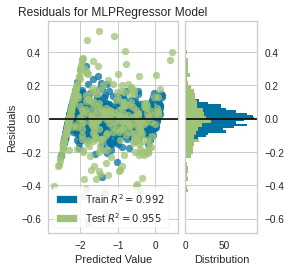

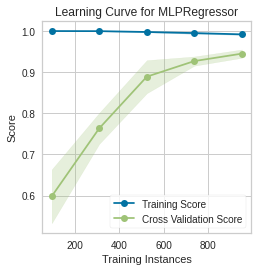

Normalization Type: StandardScaler
Shape After Handling Outliers (1407, 20)
                          Model  Test_Score    CV_MEAN      RMSE
0              linear_regressor    0.792024  77.151234  0.447177
1                 svm_regressor    0.885887  88.560162  0.331237
2                 MLP_regressor    0.995513  98.561360  0.065679
3       random_forest_regressor    0.684380  67.914013  0.550877
4   gradient_boosting_regressor    0.825219  79.142359  0.409940
5               lasso_regressor    0.792651  77.372572  0.446501
6  hist_grad_boosting_regressor    0.836411  80.995264  0.396597
	 Best MODEL: MLP_regressor
Best parameters: {'early_stopping': True, 'max_iter': 1000, 'solver': 'lbfgs'}
Best Average Score: 98.5613602136363
RMSE: 0.06567910063986525
	 ========RESIDUAL PLOT=======


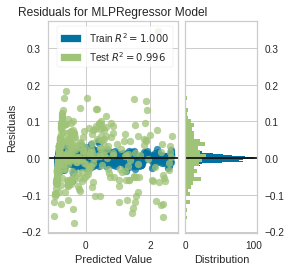

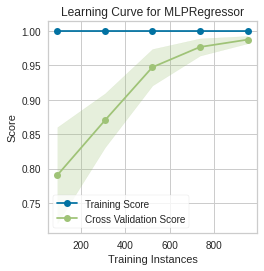

Normalization Type: QuantileScaler
Shape After Handling Outliers (1500, 20)
                          Model  Test_Score    CV_MEAN      RMSE
0              linear_regressor    0.707948  66.080572  1.471567
1                 svm_regressor    0.698575  69.058780  1.494996
2                 MLP_regressor    0.671205  60.755480  1.561396
3       random_forest_regressor    0.578659  56.203609  1.767531
4   gradient_boosting_regressor    0.681102  66.220635  1.537716
5               lasso_regressor    0.708526  66.110324  1.470111
6  hist_grad_boosting_regressor    0.675920  66.862981  1.550161
	 Best MODEL: lasso_regressor
Best parameters: {}
Best Average Score: 66.11032382360477
RMSE: 1.4701105235084013
	 ========RESIDUAL PLOT=======


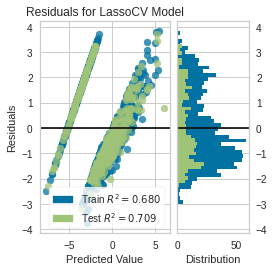

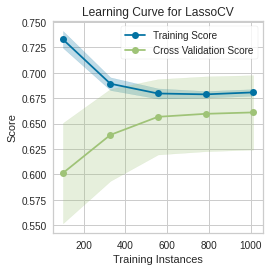

Done!


In [33]:
import warnings
warnings.filterwarnings('ignore')

# list of dictionary of all the model, with values as models best score with
# different Imputation and Scaling Strategy.
score_dict_list = []

# initiate training, where all the models are trained against
# the current imputation technique and all the scaling techniques in a loop
init_training(train_data)
print('Done!')

#Result

## Best Performing Models

##Print Best Estimator for Each Model

In [34]:
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate
# printing for a single model, all the performance parameters with different
# scaling strategy

def print_best_estimator(model_name):
  """
    This function prints performance of a specific model with different
    scaling strategy.

    Parameters
    model_name (str): name of the model

    Returns
    None
  """  
  score_column_name = ['Model','Estimator', 'Scaler', 'Test_Score', 'CV_MEAN','CV_SCORE', 'RMSE', 'Best_Parameters']
  all_models = pd.DataFrame(score_dict_list, columns=score_column_name )
  best_estimator = all_models[ all_models['Test_Score'] == (all_models[ all_models['Model'] == model_name].Test_Score.max())]
  # best_estimator = all_models #To get the list of all the resuls for a single model
  best_estimator.drop(columns=['Estimator', 'CV_SCORE'], axis=1, inplace=True)

  print(tabulate(best_estimator,headers=best_estimator.columns),'\n')

In [35]:
# print_best_estimator('linear_regressor')
# print_best_estimator('svm_regressor')
print_best_estimator('MLP_regressor')

    Model          Scaler            Test_Score    CV_MEAN       RMSE  Best_Parameters
--  -------------  --------------  ------------  ---------  ---------  -------------------------------------------------------------
 9  MLP_regressor  StandardScaler      0.995513    98.5614  0.0656791  {'early_stopping': True, 'max_iter': 1000, 'solver': 'lbfgs'} 



## Extract Best Performing Model

In [36]:
score_column_name= ['Model','Estimator', 'Scaler', 'Test_Score', 'CV_MEAN','CV_SCORE', 'RMSE', 'Best_Parameters']
# Making DataFrame from dictionary
all_models = pd.DataFrame(score_dict_list, columns= score_column_name)
# Sorting w.r.t max Test score 
all_models = all_models.sort_values(by='Test_Score', ascending=False)
model_list = all_models['Model'].unique()
model_list
name = []
cv_scores = []
best_model = []

# Chosing the best performing model of each type based on maximum test score
for model in model_list:
  best_model.append(all_models[ all_models['Test_Score'] == (all_models[ all_models['Model'] == model].Test_Score.max())])

# Extracting scores for each model
stack_dict ={}
for mod in best_model:
  stack_dict[mod.values[0][0]] = mod.values[0][1]
  normalize_type = mod.values[0][2]
  name.append( mod.values[0][0])
  cv_scores.append( mod.values[0][5])

# The best model of them all, with best imputation and scaling strategy, based on maximum test score
pd.DataFrame(all_models[ all_models['Test_Score'] == (all_models['Test_Score'].max())], columns=score_column_name)

  

,Model,Estimator,Scaler,Test_Score,CV_MEAN,CV_SCORE,RMSE,Best_Parameters
9,MLP_regressor,"MLPRegressor(activation='relu', alpha=0.0001, ...",StandardScaler,0.995513,98.56136,"[0.9896888801265495, 0.9889269764412473, 0.972...",0.065679,"{'early_stopping': True, 'max_iter': 1000, 'so..."


##PLOT RESULT

In [43]:
def print_result_plot(plot_score_list, name_list):
  """ 
    Wrapper to boxplot average cross validation of all the models. 

    Parameters:
    plot_score_list (list)  : Consisting of average CV score of all
                              models.
    name_list (DataFrame): name of models

    Returns: 
    None
  """  
  from matplotlib import pyplot
  fig = pyplot.figure(figsize=(10,6)) 
  fig.suptitle('Model Comparison') 
  ax = fig.add_subplot(111) 

  sns.boxplot(data=plot_score_list, width=0.5) 
  ax.set_xticklabels(name_list)
  plt.tick_params(labelsize=15)
  plt.xticks(rotation=90)
  pyplot.show()

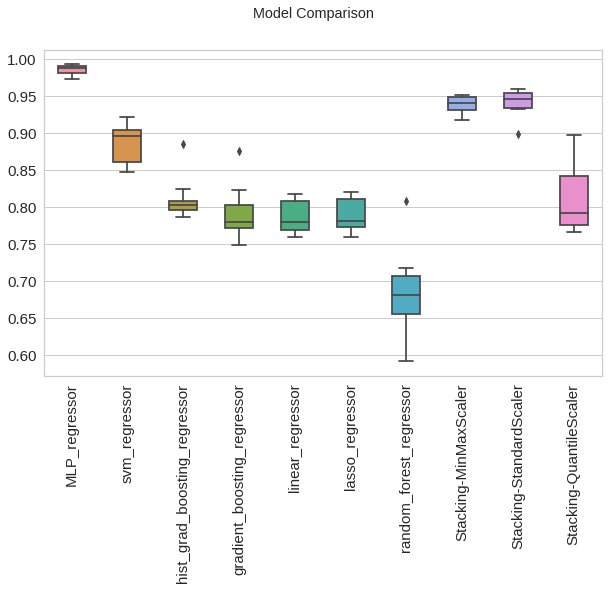

In [44]:
print_result_plot(cv_scores, name)  

#Stacking


##Applying Stacking with differenct Scaling Strategies

In [47]:
stack_name = []
stack_cv_scores = []
for normalize_type in scaler_list:
  X_train, X_test, y_train, y_test = data_normalize_split(train_data, normalize_type)
  score, accuracy, rmse, stacking_cv_score = stacking_regression(X_train, y_train, X_test, y_test)
  print(f'-------{normalize_type}----------------')
  print('SCORE :', score )
  print('ACCURACY :', accuracy )
  print('RMSE :', rmse )
  stack_cv_scores.append(stacking_cv_score)
  stack_name.append(f'Stacking-{normalize_type}')

Normalization Type: MinMaxScaler
Shape After Handling Outliers (1412, 20)
-------MinMaxScaler----------------
SCORE : 0.9375046703412547
ACCURACY : 93.824010446287
RMSE : 0.19808601072470114
Normalization Type: StandardScaler
Shape After Handling Outliers (1407, 20)
-------StandardScaler----------------
SCORE : 0.9467821199982428
ACCURACY : 94.0503722210286
RMSE : 0.22620448716418967
Normalization Type: QuantileScaler
Shape After Handling Outliers (1500, 20)
-------QuantileScaler----------------
SCORE : 0.8266891703751102
ACCURACY : 81.04370383099064
RMSE : 1.1336087037033244


##Boxplot Stacking

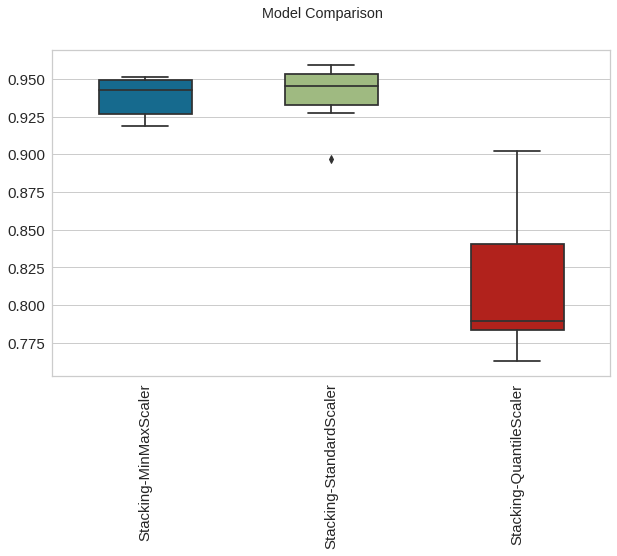

In [48]:
print_result_plot(stack_cv_scores, stack_name)

#PREDICTIONS ON HOLD OUT TEST SET

In [74]:
def prediction_test_set():
  """ 
   Prediction on hold out test set. 

    This function does the prediction on hold out test set, it scales the data
    with a scaler using the scaling strategy from which the best model is
    obtained.
    It performs prediction using the best model obtained after training.
    After predictions, 'Target' column obtained is attached to the original data 
    frame. Negative values from the 'Target' Column is clipped to 0.

    Parameters:

    Returns: 
    test_data_features (DataFrame): Contains test data along with predicted
                                    'Class' column.

  """    
  data = train_data.copy()
  training_input = data.drop('Target',axis=1)
  label_data = data['Target']
  label_data = pd.DataFrame(label_data)

  from sklearn.preprocessing import StandardScaler
  sc_in = StandardScaler()
  sc_out = StandardScaler()
  training_input = sc_in.fit_transform(training_input)
  label_data = sc_out.fit_transform(label_data)

  X_train, X_test, y_train, y_test = train_test_split(training_input,label_data,test_size=0.25,random_state=10)
  from sklearn.neural_network import MLPRegressor
  mlp = MLPRegressor(solver='lbfgs',max_iter=2000,early_stopping=True)
  mlp.fit(X_train,y_train)
  print(mlp.score(X_test,y_test))


  test_features = test_data.drop('Target',axis=1)

  test_features = sc_in.transform(test_features)

  predictions = mlp.predict(test_features)
  test_features = sc_in.inverse_transform(test_features)
  predictions = sc_out.inverse_transform(predictions)

  final_test_data['Target'] = predictions

  # Converting all the Negative VAlues to 0 in the Target column
  # as the insurance discount can not be in negative.
  final_test_data['Target'] = final_test_data['Target'].clip(lower=0)

  return final_test_data
predictions_data_set = prediction_test_set()

0.9960496273331341


Export file with filename added with current time stamp

In [75]:
import time
final_test_data.to_csv(f'CE802_P3_Test__{time.strftime("%Y%m%d-%H%M%S")}.csv')

In [76]:
predictions_data_set['Target'].describe()

count    1500.000000
mean      910.216637
std      1032.820535
min         0.000000
25%        43.666174
50%       489.899682
75%      1552.605762
max      4035.754923
Name: Target, dtype: float64